In [31]:
!python3 --version

Python 3.9.10


# SDV

- create synthetic data that with the same format and mathematical properties as the original

# Todos

- [ ] check customized distributions
- KS complement - for numerical and datetime
- TV complement - for categorical and boolean
- [ ] what is Gaussian Copula
- [ ] perform simple ML prediction to see if the results deviate much
- [ ] RDT documentation for transformers

# Load Dependencies

In [32]:
import pandas as pd
import numpy as np
import sdv 

print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")
print(f"sdv version: {sdv.__version__}")

pandas version: 2.0.3
numpy version: 1.22.4
sdv version: 1.2.1


# SDV Synthesizers

- Gaussian Copula Synthesizer
    - distributions: one of 'norm' 'beta', 'truncnorm', 'uniform', 'gamma' or 'gaussian_kde'
    - in case of non numerical data: the synthesizer converts other data types using Reversible Data Transforms (RDTs)
- CTGAN Synthesizer
- Day Z Synthesizer
- TVAE Synthesizer
- Copula GAN Synthesizer (experimental)

# Demo: Synthesize a Table (Gaussian Copula)

In [212]:
# loading demo data 
from sdv.datasets.demo import download_demo

real_data, metadata = download_demo(
    modality="single_table",
    dataset_name="fake_hotel_guests"
)

print(f"real_data type: {type(real_data)}, metadata type: {type(metadata)}")

real_data type: <class 'pandas.core.frame.DataFrame'>, metadata type: <class 'sdv.metadata.single_table.SingleTableMetadata'>


In [213]:
print(f"real_data shape is {real_data.shape}")
real_data.head()

real_data shape is (500, 9)


,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,michaelsanders@shaw.net,False,BASIC,37.89,27 Dec 2020,29 Dec 2020,131.23,"49380 Rivers Street\nSpencerville, AK 68265",4075084747483975747
1,randy49@brown.biz,False,BASIC,24.37,30 Dec 2020,02 Jan 2021,114.43,"88394 Boyle Meadows\nConleyberg, TN 22063",180072822063468
2,webermelissa@neal.com,True,DELUXE,0.00,17 Sep 2020,18 Sep 2020,368.33,"0323 Lisa Station Apt. 208\nPort Thomas, LA 82585",38983476971380
3,gsims@terry.com,False,BASIC,NaN,28 Dec 2020,31 Dec 2020,115.61,"77 Massachusetts Ave\nCambridge, MA 02139",4969551998845740
4,misty33@smith.biz,False,BASIC,16.45,05 Apr 2020,NaN,122.41,"1234 Corporate Drive\nBoston, MA 02116",3558512986488983


In [214]:
metadata

{
    "primary_key": "guest_email",
    "columns": {
        "guest_email": {
            "sdtype": "email",
            "pii": true
        },
        "has_rewards": {
            "sdtype": "boolean"
        },
        "room_type": {
            "sdtype": "categorical"
        },
        "amenities_fee": {
            "sdtype": "numerical",
            "computer_representation": "Float"
        },
        "checkin_date": {
            "sdtype": "datetime",
            "datetime_format": "%d %b %Y"
        },
        "checkout_date": {
            "sdtype": "datetime",
            "datetime_format": "%d %b %Y"
        },
        "room_rate": {
            "sdtype": "numerical",
            "computer_representation": "Float"
        },
        "billing_address": {
            "sdtype": "address",
            "pii": true
        },
        "credit_card_number": {
            "sdtype": "credit_card_number",
            "pii": true
        }
    },
    "METADATA_SPEC_VERSION": "SINGLE_TABL

In [215]:
# creating a synthesizer

from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata)

In [216]:
# a synthesizer object learns the patterns from the real data and replciates them
# to generate synthetic data

synthesizer

In [217]:
synthesizer.fit(real_data)

In [218]:
# generating synthetic data

synthetic_data = synthesizer.sample(num_rows=500)
synthetic_data.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,dsullivan@example.net,True,BASIC,2.10,26 Mar 2020,12 Apr 2020,122.83,"90469 Karla Knolls Apt. 781\nSusanberg, NC 28401",5161033759518983
1,steven59@example.org,False,DELUXE,NaN,03 Jul 2020,15 Sep 2020,175.30,"1080 Ashley Creek Apt. 622\nWest Amy, NM 25058",4133047413145475690
2,brandon15@example.net,False,DELUXE,22.38,30 Mar 2020,17 Mar 2020,151.45,"99923 Anderson Trace Suite 861\nNorth Haley, T...",4977328103788
3,humphreyjennifer@example.net,False,BASIC,8.44,05 May 2020,22 May 2020,169.82,"9301 John Parkways\nThomasland, OH 61350",3524946844839485
4,joshuabrown@example.net,False,SUITE,8.21,13 Jan 2020,10 Jan 2020,189.85,"126 George Tunnel\nDuranstad, MS 95176",4446905799576890978


In [219]:
# compare to the real data

real_data.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,michaelsanders@shaw.net,False,BASIC,37.89,27 Dec 2020,29 Dec 2020,131.23,"49380 Rivers Street\nSpencerville, AK 68265",4075084747483975747
1,randy49@brown.biz,False,BASIC,24.37,30 Dec 2020,02 Jan 2021,114.43,"88394 Boyle Meadows\nConleyberg, TN 22063",180072822063468
2,webermelissa@neal.com,True,DELUXE,0.00,17 Sep 2020,18 Sep 2020,368.33,"0323 Lisa Station Apt. 208\nPort Thomas, LA 82585",38983476971380
3,gsims@terry.com,False,BASIC,NaN,28 Dec 2020,31 Dec 2020,115.61,"77 Massachusetts Ave\nCambridge, MA 02139",4969551998845740
4,misty33@smith.biz,False,BASIC,16.45,05 Apr 2020,NaN,122.41,"1234 Corporate Drive\nBoston, MA 02116",3558512986488983


In [220]:
# evaluating real vs. synthetic data

from sdv.evaluation.single_table import evaluate_quality 

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Creating report: 100%|████████████████████████████| 4/4 [00:00<00:00, 71.06it/s]


Overall Quality Score: 87.7%

Properties:
Column Shapes: 87.45%
Column Pair Trends: 87.94%


In [221]:
# visualizing the report

quality_report.get_visualization('Column Shapes')

In [222]:
# visualizing the data

from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name="room_type",
    metadata=metadata
)

fig.show()

In [223]:
# visualizing the data

from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name="room_rate",
    metadata=metadata
)

fig.show()

In [224]:
from sdv.evaluation.single_table import get_column_pair_plot

fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=["room_rate", "room_type"],
    metadata=metadata
)

fig.show()

In [230]:
# SDMetrics Quality Report

print(f"""
quality score: \n{quality_report.get_score()},\n
quality properties: \n{quality_report.get_properties()},\n
quality details: \n{quality_report.get_details(property_name='Column Shapes')}\n
""")


quality score: 
0.8769582836077001,

quality properties: 
             Property     Score
0       Column Shapes  0.874541
1  Column Pair Trends  0.879376,

quality details: 
          Column        Metric  Quality Score
0  amenities_fee  KSComplement       0.704163
1   checkin_date  KSComplement       0.968000
2  checkout_date  KSComplement       0.977083
3      room_rate  KSComplement       0.732000
4    has_rewards  TVComplement       0.952000
5      room_type  TVComplement       0.914000




In [229]:
# run diagnostic

from sdv.evaluation.single_table import run_diagnostic

diagnostic_report = run_diagnostic(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Creating report: 100%|████████████████████████████| 4/4 [00:00<00:00,  4.62it/s]


DiagnosticResults:

SUCCESS:
✓ The synthetic data covers over 90% of the numerical ranges present in the real data
✓ The synthetic data covers over 90% of the categories present in the real data
✓ Over 90% of the synthetic rows are not copies of the real data
✓ The synthetic data follows over 90% of the min/max boundaries set by the real data


In [232]:
# diagnostic report

print(f"""
diagnostic properties: \n{diagnostic_report.get_properties()},\n
quality details: \n{diagnostic_report.get_details(property_name='Coverage')}\n
""")


diagnostic properties: 
{'Coverage': 0.9792679536290724, 'Synthesis': 0.978, 'Boundaries': 1.0},

quality details: 
          Column            Metric  Diagnostic Score
0  amenities_fee     RangeCoverage          1.000000
1   checkin_date     RangeCoverage          0.994565
2  checkout_date     RangeCoverage          0.997275
3      room_rate     RangeCoverage          0.883767
4    has_rewards  CategoryCoverage          1.000000
5      room_type  CategoryCoverage          1.000000




In [46]:
# Gaussian Copula Customization 
# By setting these distributions strategically, you can make tradeoffs in the quality of your synthetic data.

custom_synthesizer = GaussianCopulaSynthesizer(
    metadata,
    default_distribution="truncnorm",
    numerical_distributions={
        "checkin_date": "uniform",
        "checkout_date": "uniform",
        "room_rate": "gaussian_kde"
    }
)

custom_synthesizer.fit(real_data)

In [47]:
learned_distributions = custom_synthesizer.get_learned_distributions()
learned_distributions["has_rewards"]

{'distribution': 'truncnorm',
 'learned_parameters': {'a': 0.0,
  'b': 2.58752200164132,
  'loc': 0.002234955832489116,
  'scale': 0.7617163158909614}}

In [48]:
synthetic_data_customized = custom_synthesizer.sample(num_rows=500) # results are random

quality_report = evaluate_quality(
    real_data,
    synthetic_data_customized,
    metadata
)

Creating report: 100%|███████████████████████████| 4/4 [00:00<00:00, 106.21it/s]


Overall Quality Score: 91.03%

Properties:
Column Shapes: 91.39%
Column Pair Trends: 90.67%


In [51]:
fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data_customized,
    column_name="room_type",
    metadata=metadata
)

fig.show()

In [50]:
quality_report.get_visualization('Column Shapes')

In [52]:
# conditional sampling
# scenario: every hotel guest is staying in a SUITE (half with rewards and half without)

from sdv.sampling import Condition

suite_guests_with_rewards = Condition(
    num_rows=250,
    column_values={"room_type": "SUITE", "has_rewards":True}
)

suite_guests_without_rewards = Condition(
    num_rows=250,
    column_values={"room_type": "SUITE", "has_rewards": False}
)


In [54]:
# simulate the scenario 

simulated_synthetic_data = custom_synthesizer.sample_from_conditions(
    conditions=[suite_guests_with_rewards,
                suite_guests_without_rewards]
)

Sampling conditions: 100%|██████████████████| 500/500 [00:00<00:00, 2175.39it/s]


In [55]:
# verify the result

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=simulated_synthetic_data,
    column_name="room_type",
    metadata=metadata,
)

fig.update_layout(
    title="using synthetic data to simualte room_type scenario"
)

fig.show()

In [59]:
real_data.room_type.value_counts()

room_type
BASIC     384
DELUXE     78
SUITE      38
Name: count, dtype: int64

In [60]:
simulated_synthetic_data.room_type.value_counts()

room_type
SUITE    500
Name: count, dtype: int64

# Synthesize a Table (CTGAN) - slow for large dataset

## About CTGAN



In [62]:
# loading demo data 
from sdv.datasets.demo import download_demo

real_data, metadata = download_demo(
    modality="single_table",
    dataset_name="fake_hotel_guests"
)

print(f"real_data type: {type(real_data)}, metadata type: {type(metadata)}")

real_data type: <class 'pandas.core.frame.DataFrame'>, metadata type: <class 'sdv.metadata.single_table.SingleTableMetadata'>


In [63]:
from sdv.single_table import CTGANSynthesizer

synthesizer = CTGANSynthesizer(metadata)
synthesizer.fit(real_data)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning:

Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning:

Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning:

Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning:

Future versions of RDT will not support the 'mod

In [64]:
# generate synthetic data

synthetic_data = synthesizer.sample(num_rows=500)
synthetic_data.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,dsullivan@example.net,False,BASIC,19.31,14 Mar 2020,25 Oct 2020,351.78,"90469 Karla Knolls Apt. 781\nSusanberg, NC 28401",5161033759518983
1,steven59@example.org,False,DELUXE,0.00,21 Dec 2019,27 Jan 2020,253.92,"1080 Ashley Creek Apt. 622\nWest Amy, NM 25058",4133047413145475690
2,brandon15@example.net,False,BASIC,22.19,12 Jun 2020,10 Jan 2020,275.21,"99923 Anderson Trace Suite 861\nNorth Haley, T...",4977328103788
3,humphreyjennifer@example.net,True,BASIC,12.09,28 Aug 2020,04 Aug 2020,355.95,"9301 John Parkways\nThomasland, OH 61350",3524946844839485
4,joshuabrown@example.net,False,BASIC,14.92,01 Feb 2020,22 Mar 2020,319.40,"126 George Tunnel\nDuranstad, MS 95176",4446905799576890978


In [66]:
# evaluation 
from sdv.evaluation.single_table import evaluate_quality 

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Creating report: 100%|████████████████████████████| 4/4 [00:00<00:00, 69.90it/s]


Overall Quality Score: 78.86%

Properties:
Column Shapes: 79.31%
Column Pair Trends: 78.4%


In [70]:
quality_report.get_visualization("Column Shapes")

In [72]:
# visualizing the data
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name="room_type",
    metadata=metadata
)

fig.show()

In [73]:
# customization 

custom_synthesizer = CTGANSynthesizer(
    metadata,
    epochs=1000 # use higher epochs to improve the data quality
)

custom_synthesizer.fit(real_data)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning:

Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning:

Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning:

Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/rdt/transformers/base.py:132: FutureWarning:

Future versions of RDT will not support the 'mod

In [74]:
synthetic_data_customized = custom_synthesizer.sample(num_rows=500)

quality_report = evaluate_quality(
    real_data,
    synthetic_data_customized,
    metadata
)

Creating report: 100%|████████████████████████████| 4/4 [00:00<00:00, 91.07it/s]


Overall Quality Score: 84.37%

Properties:
Column Shapes: 85.86%
Column Pair Trends: 82.87%


# Synthetic Sequence (PAR)

- suited for multi-sequence data
    - multi-sequence: multiple sequences exist in the same table (e.g. different sequences for each company)

In [75]:
# loading demo data

from sdv.datasets.demo import download_demo

real_data, metadata = download_demo(
    modality="sequential",
    dataset_name="nasdaq100_2019"
)

In [77]:
real_data.head()

,Symbol,Date,Open,Close,Volume,MarketCap,Sector,Industry
0,AAPL,2018-12-31,39.632500,39.435001,140014000,7.378734e+11,Technology,Computer Manufacturing
1,AAPL,2019-01-02,38.722500,39.480000,148158800,7.378734e+11,Technology,Computer Manufacturing
2,AAPL,2019-01-03,35.994999,35.547501,365248800,7.378734e+11,Technology,Computer Manufacturing
3,AAPL,2019-01-04,36.132500,37.064999,234428400,7.378734e+11,Technology,Computer Manufacturing
4,AAPL,2019-01-07,37.174999,36.982498,219111200,7.378734e+11,Technology,Computer Manufacturing


In [78]:
metadata

{
    "columns": {
        "Symbol": {
            "sdtype": "id",
            "regex_format": "[A-Z]{4}"
        },
        "Date": {
            "sdtype": "datetime",
            "datetime_format": "%Y-%m-%d"
        },
        "Open": {
            "sdtype": "numerical",
            "computer_representation": "Float"
        },
        "Close": {
            "sdtype": "numerical",
            "computer_representation": "Float"
        },
        "Volume": {
            "sdtype": "numerical",
            "computer_representation": "Int64"
        },
        "MarketCap": {
            "sdtype": "numerical",
            "computer_representation": "Float"
        },
        "Sector": {
            "sdtype": "categorical"
        },
        "Industry": {
            "sdtype": "categorical"
        }
    },
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "sequence_index": "Date",
    "sequence_key": "Symbol"
}

In [85]:
real_data

,Symbol,Date,Open,Close,Volume,MarketCap,Sector,Industry
0,AAPL,2018-12-31,39.632500,39.435001,140014000,7.378734e+11,Technology,Computer Manufacturing
1,AAPL,2019-01-02,38.722500,39.480000,148158800,7.378734e+11,Technology,Computer Manufacturing
2,AAPL,2019-01-03,35.994999,35.547501,365248800,7.378734e+11,Technology,Computer Manufacturing
3,AAPL,2019-01-04,36.132500,37.064999,234428400,7.378734e+11,Technology,Computer Manufacturing
4,AAPL,2019-01-07,37.174999,36.982498,219111200,7.378734e+11,Technology,Computer Manufacturing
...,...,...,...,...,...,...,...,...
25779,LBTYA,2019-12-23,22.690001,22.799999,906400,3.143930e+10,Consumer Services,Television Services
25780,LBTYA,2019-12-24,22.780001,22.790001,334900,3.143930e+10,Consumer Services,Television Services
25781,LBTYA,2019-12-26,22.850000,22.420000,782200,3.143930e+10,Consumer Services,Television Services
25782,LBTYA,2019-12-27,22.510000,22.790001,909600,3.143930e+10,Consumer Services,Television Services


In [88]:
# PAR synthesizer learns sequences info based on the context 
# context columns dont change during the course of a sequence
# sector and industry are context columns

print(real_data[real_data["Symbol"]  == "AAPL"]["Sector"].unique())
print(real_data[real_data["Symbol"]  == "AAPL"]["Industry"].unique())

['Technology']
['Computer Manufacturing']


In [89]:
# create a synthesizer
from sdv.sequential import PARSynthesizer

synthesizer = PARSynthesizer(
    metadata,
    context_columns=["Sector", "Industry"]
)

synthesizer.fit(real_data)

In [93]:
# generate synthetic data

synthetic_data = synthesizer.sample(num_sequences=10)
synthetic_data.head()

,Symbol,Date,Open,Close,Volume,MarketCap,Sector,Industry
0,AATG,2019-01-02,182.493045,183.531971,6569659,1.676731e+11,Technology,EDP Services
1,AATG,2019-01-03,161.584774,177.408223,10165381,5.636713e+10,Technology,EDP Services
2,AATG,2019-01-06,205.977698,202.854469,6569659,4.926206e+10,Technology,EDP Services
3,AATG,2019-01-04,183.437196,181.003758,9012668,4.349419e+10,Technology,EDP Services
4,AATG,2019-01-07,169.402911,217.835197,3301447,4.008998e+10,Technology,EDP Services


In [94]:
synthetic_data[["Symbol", "Industry"]].groupby(["Symbol"]).first().reset_index()

,Symbol,Industry
0,AATG,EDP Services
1,AATH,Industrial Machinery/Components
2,AATI,Catalog/Specialty Distribution
3,AATJ,Computer Software: Prepackaged Software
4,AATK,None
5,AATL,Business Services
6,AATM,EDP Services
7,AATN,Automotive Aftermarket
8,AATO,Biotechnology: Laboratory Analytical Instruments
9,AATP,Computer Software: Prepackaged Software


In [95]:
# PAR customization

custom_synthesizer = PARSynthesizer(
    metadata,
    epochs=20,
    context_columns=["Sector", "Industry"],
    verbose=True
)

custom_synthesizer.fit(real_data)

Epoch 20 | Loss 3.9627816677093506: 100%|███████| 20/20 [00:08<00:00,  2.48it/s]


## sampling options

In [96]:
# sepcify sequence length

custom_synthesizer.sample(num_sequences=3, sequence_length=2)

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 230.34it/s]


,Symbol,Date,Open,Close,Volume,MarketCap,Sector,Industry
0,AAAA,2019-01-01,5.290000,183.531971,9903697,NaN,NaN,Biotechnology: Commercial Physical & Biologica...
1,AAAA,2018-12-27,5.290000,129.370016,6569659,NaN,NaN,Biotechnology: Commercial Physical & Biologica...
2,AAAB,2019-01-11,340.630819,183.531971,6569659,NaN,NaN,Automotive Aftermarket
3,AAAB,2018-12-22,331.118758,77.386954,6517481,NaN,NaN,Automotive Aftermarket
4,AAAC,2018-12-25,183.437196,183.531971,6569659,NaN,NaN,Biotechnology: In Vitro & In Vivo Diagnostic S...
5,AAAC,2019-01-03,183.437196,107.123690,6569659,7.808098e+10,NaN,Biotechnology: In Vitro & In Vivo Diagnostic S...


In [ ]:
# conditional sampling using context

import pandas as pd

# create 2 companies in the Tech sector and 3 others in Consumer Service sector
# each rwo corresponds to a new sequence that we want to synthesize
scenario_context = pd.DataFrame(data={
    'Symbol': ['COMPANY-A', 'COMPANY-B', 'COMPANY-C', 'COMPANY-D', 'COMPANY-E'],
    'Sector': ['Technology']*2 + ['Consumer Services']*3,
    'Industry': ['Computer Manufacturing', 'Computer Software: Prepackaged Software',
                 'Hotels/Resorts', 'Restaurants', 'Clothing/Shoe/Accessory Stores']
})

scenario_context

In [98]:
# simulate this scenario using trained synthesizer

custom_synthesizer.sample_sequential_columns(
    context_columns=scenario_context,
    sequence_length=2
)

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 85.54it/s]


,Symbol,Date,Open,Close,Volume,MarketCap,Sector,Industry
0,COMPANY-A,2019-01-01,33.321702,183.531971,6569659,5.893961e+09,Technology,Computer Manufacturing
1,COMPANY-A,2019-01-01,183.437196,5.270000,6569659,1.212127e+11,Technology,Computer Manufacturing
2,COMPANY-B,2019-01-01,449.081913,274.051167,10292597,1.201324e+10,Technology,Computer Software: Prepackaged Software
3,COMPANY-B,2019-01-03,168.171982,222.362615,6569659,NaN,Technology,Computer Software: Prepackaged Software
4,COMPANY-C,2019-01-01,604.437355,98.490577,6569659,NaN,Consumer Services,Hotels/Resorts
5,COMPANY-C,2019-01-11,183.437196,135.201267,6569659,5.893961e+09,Consumer Services,Hotels/Resorts
6,COMPANY-D,2019-01-05,183.437196,183.531971,6569659,NaN,Consumer Services,Restaurants
7,COMPANY-D,2019-01-03,5.290000,78.547985,6569659,8.760090e+10,Consumer Services,Restaurants
8,COMPANY-E,2019-01-01,5.290000,541.288333,6569659,NaN,Consumer Services,Clothing/Shoe/Accessory Stores
9,COMPANY-E,2019-01-02,183.437196,5.270000,10534975,NaN,Consumer Services,Clothing/Shoe/Accessory Stores


# Synthesize Multiple Tables (HMA)

- to create multiple, connected tables and evaluate it

In [99]:
# load demo data

from sdv.datasets.demo import download_demo 

real_data, metadata = download_demo(
    modality="multi_table",
    dataset_name="fake_hotels"
)

In [102]:
real_data.keys()

dict_keys(['hotels', 'guests'])

In [103]:
type(real_data["hotels"])

pandas.core.frame.DataFrame

In [104]:
real_data["hotels"].head()

,hotel_id,city,state,rating,classification
0,HID_000,Boston,Massachusetts,4.8,RESORT
1,HID_001,Boston,Massachuesetts,4.1,CHAIN
2,HID_002,San Francisco,California,3.8,MOTEL
3,HID_003,San Francisco,California,4.0,CHAIN
4,HID_004,New York City,New York,3.7,MOTEL


In [105]:
real_data["guests"].head()

,guest_email,hotel_id,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,awolf@phillips.com,HID_000,False,BASIC,37.89,27 Dec 2020,28 Dec 2020,156.23,"993 Rebecca Landing\nJesseburgh, PA 05072",4075084747483975747
1,tonya44@wilkinson-wilkins.com,HID_000,False,BASIC,24.37,30 Dec 2020,31 Dec 2020,139.43,"958 Beverly Bypass\nSouth Ronald, GA 46368",180072822063468
2,harriskathleen@goodwin.com,HID_000,True,DELUXE,0.00,17 Sep 2020,19 Sep 2020,403.33,"8302 Nathaniel Pike\nRileyland, TX 71613",38983476971380
3,kayladiaz@wallace-simmons.com,HID_000,False,BASIC,NaN,28 Dec 2020,30 Dec 2020,140.61,"77 Massachusetts Ave\nCambridge, MA 02139",4969551998845740
4,paigemendoza@tran-martin.com,HID_000,True,DELUXE,0.00,05 Apr 2020,10 Apr 2020,197.41,"1234 Corporate Drive\nBoston, MA 02116",3558512986488983


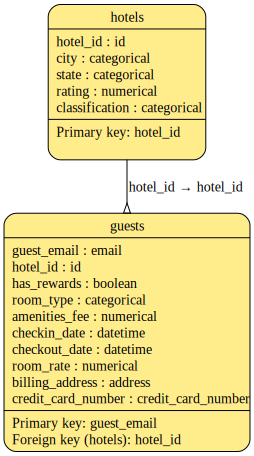

In [111]:
metadata.visualize() # requires graphviz -> `brew install graphviz`

In [112]:
# creating synthesizer

from sdv.multi_table import HMASynthesizer

synthesizer = HMASynthesizer(metadata)
synthesizer.fit(real_data)

Preprocess Tables: 100%|██████████████████████████| 2/2 [00:00<00:00, 14.18it/s]



Learning relationships:


(1/1) Tables 'hotels' and 'guests' ('hotel_id'): 100%|█| 10/10 [00:01<00:00,  6.


Modeling Tables: 100%|████████████████████████████| 1/1 [00:01<00:00,  1.01s/it]


In [113]:
# generating synthetic data
synthetic_data = synthesizer.sample(scale=2) # scale=2: create twice as many hotels and guests as the original data contained

In [115]:
synthetic_data["hotels"].head()

,hotel_id,city,state,rating,classification
0,HID_000,San Francisco,California,4.3,CHAIN
1,HID_001,San Francisco,New York,4.2,RESORT
2,HID_002,San Francisco,Texas,4.0,MOTEL
3,HID_003,Boston,Massachuesetts,4.8,RESORT
4,HID_004,New York City,Texas,4.8,MOTEL


In [116]:
synthetic_data["guests"].head()

,guest_email,hotel_id,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,moodyeric@example.net,HID_000,False,BASIC,46.64,28 Sep 2020,30 Aug 2020,197.78,"PSC 4273, Box 0888\nAPO AA 28423",5161033759518983
1,coryguzman@example.com,HID_000,False,DELUXE,3.26,29 Jul 2020,08 Jul 2020,200.60,"417 Lawrence Hollow\nEast Ericshire, NM 88906",4133047413145475690
2,caitlinlee@example.net,HID_000,False,BASIC,10.94,01 Dec 2020,29 Oct 2020,194.84,"69754 Mcguire Haven Apt. 260\nCrawfordside, RI...",4977328103788
3,andreasmith@example.net,HID_000,False,BASIC,0.22,07 Oct 2020,03 Oct 2020,145.83,"402 Joy Overpass Suite 974\nJoview, WV 75960",3524946844839485
4,fostermichael@example.com,HID_000,False,BASIC,24.39,28 Dec 2020,25 Nov 2020,207.19,"545 Brown Via\nTeresaport, TX 36995",4446905799576890978


In [119]:
# evaluation 

from sdv.evaluation.multi_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata,
    verbose=True
)

Creating report: 100%|████████████████████████████| 5/5 [00:00<00:00, 53.28it/s]



Overall Quality Score: 74.33%

Properties:
Column Shapes: 83.02%
Column Pair Trends: 69.98%
Parent Child Relationships: 70.0%


In [120]:
fig = quality_report.get_visualization("Column Shapes", table_name="guests")

fig.show()

# Prepare Your Own Data

In [121]:
# loading data

from sdv.datasets.local import load_csvs
from sdv.datasets.demo import download_demo

# This is the default folder name that the GOogle Colab notebook uses.
# Change this if you have your own folder with CSV files.
FOLDER_NAME = 'content/'

try:
  datasets = load_csvs(folder_name='/content/')
except ValueError:
  print('You have not uploaded any csv files. Using some demo data instead.')
  datasets, _ = download_demo(
    modality='multi_table',
    dataset_name='fake_hotels'
  )

You have not uploaded any csv files. Using some demo data instead.


In [123]:
# writing a metadata description
from sdv.metadata import MultiTableMetadata

metadata = MultiTableMetadata()

In [124]:
# auto detect metadata

metadata.detect_table_from_dataframe(
    table_name="guests",
    data=datasets["guests"]
)

metadata.detect_table_from_dataframe(
    table_name="hotels",
    data=datasets["hotels"]
)

In [125]:
print(metadata)

{
    "tables": {
        "guests": {
            "columns": {
                "guest_email": {
                    "sdtype": "categorical"
                },
                "hotel_id": {
                    "sdtype": "categorical"
                },
                "has_rewards": {
                    "sdtype": "boolean"
                },
                "room_type": {
                    "sdtype": "categorical"
                },
                "amenities_fee": {
                    "sdtype": "numerical"
                },
                "checkin_date": {
                    "sdtype": "categorical"
                },
                "checkout_date": {
                    "sdtype": "categorical"
                },
                "room_rate": {
                    "sdtype": "numerical"
                },
                "billing_address": {
                    "sdtype": "categorical"
                },
                "credit_card_number": {
                    "sdtype": "numerica

In [126]:
# fixing data types -> convert to datetime 

metadata.update_column(
    table_name="guests",
    column_name="checkin_date",
    sdtype="datetime",
    datetime_format="%d %b %Y"
)

metadata.update_column(
    table_name="guests",
    column_name="checkout_date",
    sdtype="datetime",
    datetime_format="%d %b %Y"
)


In [128]:
# fixing data types -> ID columns dont have statistical value

metadata.update_column(
    table_name="hotels",
    column_name="hotel_id",
    sdtype="id",
    regex_format="HID_[0-9]{3,4}"
)

metadata.update_column(
    table_name="guests",
    column_name="hotel_id",
    sdtype="id",
    regex_format="HID_[0-9]{3,4}"
)

In [131]:
# sensitive info

metadata.update_column(
    table_name="guests",
    column_name="guest_email",
    sdtype="email",
    pii=True
)

metadata.update_column(
    table_name="guests",
    column_name="billing_address",
    sdtype="address",
    pii=True
)

metadata.update_column(
    table_name="guests",
    column_name="credit_card_number",
    sdtype="credit_card_number",
    pii=True
)

In [132]:
# adding identifier and keys

metadata.set_primary_key(
    table_name="hotels",
    column_name="hotel_id"
)

metadata.set_primary_key(
    table_name="guests",
    column_name="guest_email"
)

In [133]:
# adding alternate keys: also unique to the table but they are not primary keys

metadata.add_alternate_keys(
    table_name="guests",
    column_names=["credit_card_number"]
)

In [134]:
# specifying relationships

metadata.add_relationship(
    parent_table_name="hotels",
    child_table_name="guests",
    parent_primary_key="hotel_id",
    child_foreign_key="hotel_id"
)

In [137]:
# validation
# if successful, the code should run wihtout any errors
metadata.validate()

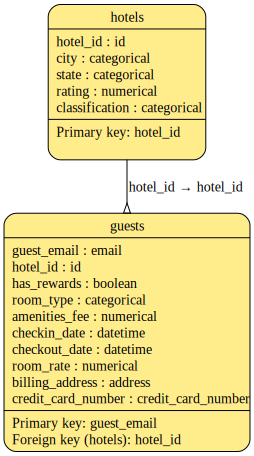

In [138]:
metadata.visualize()

In [140]:
# creating synthetic data
from sdv.multi_table import HMASynthesizer 

synthesizer = HMASynthesizer(metadata)
synthesizer.validate(datasets)

In [143]:
synthesizer.fit(datasets)

Preprocess Tables: 100%|██████████████████████████| 2/2 [00:00<00:00, 18.72it/s]



Learning relationships:


(1/1) Tables 'hotels' and 'guests' ('hotel_id'): 100%|█| 10/10 [00:01<00:00,  6.


Modeling Tables: 100%|████████████████████████████| 1/1 [00:01<00:00,  1.03s/it]


In [144]:
synthetic_data = synthesizer.sample(scale=1)

In [145]:
synthetic_data["guests"].head(3)

,guest_email,hotel_id,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,moodyeric@example.net,HID_000,False,BASIC,46.64,28 Sep 2020,30 Aug 2020,197.78,"PSC 4273, Box 0888\nAPO AA 28423",5161033759518983
1,coryguzman@example.com,HID_000,False,DELUXE,3.26,29 Jul 2020,08 Jul 2020,200.60,"417 Lawrence Hollow\nEast Ericshire, NM 88906",4133047413145475690
2,caitlinlee@example.net,HID_000,False,BASIC,10.94,01 Dec 2020,29 Oct 2020,194.84,"69754 Mcguire Haven Apt. 260\nCrawfordside, RI...",4977328103788


# Adding Constraints

- adding logical or business rules in order to create valid data

In [146]:
from sdv.datasets.demo import download_demo

real_data, metadata = download_demo(
    modality="single_table",
    dataset_name="fake_hotel_guests"
)

In [147]:
real_data.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,michaelsanders@shaw.net,False,BASIC,37.89,27 Dec 2020,29 Dec 2020,131.23,"49380 Rivers Street\nSpencerville, AK 68265",4075084747483975747
1,randy49@brown.biz,False,BASIC,24.37,30 Dec 2020,02 Jan 2021,114.43,"88394 Boyle Meadows\nConleyberg, TN 22063",180072822063468
2,webermelissa@neal.com,True,DELUXE,0.00,17 Sep 2020,18 Sep 2020,368.33,"0323 Lisa Station Apt. 208\nPort Thomas, LA 82585",38983476971380
3,gsims@terry.com,False,BASIC,NaN,28 Dec 2020,31 Dec 2020,115.61,"77 Massachusetts Ave\nCambridge, MA 02139",4969551998845740
4,misty33@smith.biz,False,BASIC,16.45,05 Apr 2020,NaN,122.41,"1234 Corporate Drive\nBoston, MA 02116",3558512986488983


In [148]:
# create synthetic data

from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(real_data)
synthetic_data = synthesizer.sample(num_rows=500)

In [150]:
# compare the synthetic data to the real data
from sdv.evaluation.single_table import get_column_pair_plot

fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['room_rate', 'room_type'],
    metadata=metadata)
    
fig.show()

In [153]:
# adding constraints: checkin should be < checkout date

real_dates = real_data[["checkin_date", "checkout_date"]].dropna()
violations = pd.to_datetime(real_dates["checkin_date"]) >= pd.to_datetime(real_dates["checkout_date"])

print(f"no. of violations in the real data: {len([row for row in violations if row==True])}")

no. of violations in the real data: 0


In [155]:
synthetic_dates = synthetic_data[["checkin_date", "checkout_date"]].dropna()
violations = pd.to_datetime(synthetic_dates["checkin_date"]) >= pd.to_datetime(synthetic_dates["checkout_date"])

print(f"no. of violations in the synthetic data: {len([row for row in violations if row == True])}")

no. of violations in the synthetic data: 230


In [158]:
# applying predefined logic

checkin_lessthan_checkout = {
    "constraint_class": "Inequality",
    "constraint_parameters": {
        "low_column_name": "checkin_date",
        "high_column_name": "checkout_date"
    }
}

In [159]:
synthesizer.add_constraints([
    checkin_lessthan_checkout
])

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sdv/single_table/base.py:356: UserWarning:

For these constraints to take effect, please refit the synthesizer using 'fit'.



In [160]:
synthesizer.fit(real_data)

In [161]:
synthetic_data_constrained = synthesizer.sample(num_rows=500)

synthetic_dates = synthetic_data_constrained[["checkin_date", "checkout_date"]].dropna()
violations = pd.to_datetime(synthetic_dates["checkin_date"]) >= pd.to_datetime(synthetic_dates["checkout_date"])

print(f"no. of violations in the synthetic data: {len([row for row in violations if row == True])}")

Sampling rows: 100%|████████████████████████| 500/500 [00:00<00:00, 1518.10it/s]

no. of violations in the synthetic data: 0


In [164]:
# rewards members dont pay amenities fees
# if has_rewards == True -> amenities_fee == 0

violations = real_data[(real_data["has_rewards"] == True) & (real_data["amenities_fee"] > 0.0)]
print(f"no. of violations in the real data {len(violations)}")

violations = synthetic_data[(synthetic_data["has_rewards"] == True) & (synthetic_data["amenities_fee"] > 0.0)]
print(f"no. of violations in the synthetic data {len(violations)}")

no. of violations in the real data 0
no. of violations in the synthetic data 66


## writing a custom constraint class

logic:
- `is_valid`: a function taht returns whether the rule is valid for every row in the table
- `transform`: a pre-processing step, applied before the machine learning
- `reverse_transform`: a post-processing step, applied to the synthetic data

In [166]:
def is_valid(column_names, data):
    boolean_column = column_names[0]
    numerical_column = column_names[1]

    true_values = (data[boolean_column] == True) & (data[numerical_column] == 0.0)
    false_values = (data[boolean_column] == False)

    return (true_values) | (false_values)

In [167]:
validity_check = is_valid(['has_rewards', 'amenities_fee'], real_data)
validity_check.value_counts()

True    500
Name: count, dtype: int64

In [168]:
def transform(column_names, data):
    boolean_column = column_names[0]
    numerical_column = column_names[1]

    typical_values = data[numerical_column].median()
    data[numerical_column] = data[numerical_column].mask(data[boolean_column] == True, typical_value)

    return data

In [169]:
def reverse_transform(column_names, data):
    boolean_column = column_names[0]
    numerical_column = column_names[1]

    data[numerical_column] = data[numerical_column].mask(data[boolean_column] == True, 0.0)

    return data

In [172]:
# putting it altogether
from sdv.constraints import create_custom_constraint_class

IfTrueThenZero = create_custom_constraint_class(
    is_valid_fn=is_valid,
    transform_fn=transform,
    reverse_transform_fn=reverse_transform
)

In [ ]:
# add to the class object

synthesizer.add_custom_constraint_class(
    class_object=IfTrueThenZero, 
    class_name="IfTrueThenZero"
)

In [175]:
rewards_member_no_fee = {
    "constraint_class": "IfTrueThenZero",
    "constraint_parameters": {
        "column_names": ["has_rewards", "amenities_fee"]
    }
}

In [176]:
synthesizer.add_constraints([
    rewards_member_no_fee
])

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sdv/single_table/base.py:356: UserWarning:

For these constraints to take effect, please refit the synthesizer using 'fit'.



In [177]:
synthesizer.fit(real_data)
synthetic_data_custom_constraint = synthesizer.sample(num_rows=500)

Sampling rows: 100%|█████████████████████████| 500/500 [00:00<00:00, 763.17it/s]


In [178]:
synthetic_data_custom_constraint.head(5)

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,dsullivan@example.net,False,DELUXE,1.66,22 Nov 2020,23 Nov 2020,185.47,"90469 Karla Knolls Apt. 781\nSusanberg, NC 28401",5161033759518983
1,steven59@example.org,False,BASIC,41.18,27 Jan 2020,29 Jan 2020,204.08,"1080 Ashley Creek Apt. 622\nWest Amy, NM 25058",4133047413145475690
2,brandon15@example.net,False,BASIC,18.27,18 Oct 2020,19 Oct 2020,143.93,"99923 Anderson Trace Suite 861\nNorth Haley, T...",4977328103788
3,humphreyjennifer@example.net,False,DELUXE,16.60,08 Jun 2020,09 Jun 2020,223.95,"9301 John Parkways\nThomasland, OH 61350",3524946844839485
4,moondavid@example.com,False,BASIC,48.12,20 Nov 2020,21 Nov 2020,126.74,"812 Kimberly Forges\nEast Brianafurt, AR 16834",4265310195602383


In [179]:
validity_check = is_valid(['has_rewards', 'amenities_fee'], synthetic_data_custom_constraint)
validity_check.value_counts()

True    500
Name: count, dtype: int64

# Custom Processing

## Pre-processing and Post-processing

In [182]:
from sdv.datasets.demo import download_demo

real_data, metadata = download_demo(
    modality="single_table",
    dataset_name="fake_hotel_guests"
)

In [184]:
# preprocessing

from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata)
preprocessed_data = synthesizer.preprocess(real_data)

preprocessed_data.head()

,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate
guest_email,,,,,,
michaelsanders@shaw.net,0.716567,0.992246,37.890000,1.609027e+18,1.609200e+18,131.23
randy49@brown.biz,0.294561,0.082054,24.370000,1.609286e+18,1.609546e+18,114.43
webermelissa@neal.com,1.963522,1.134625,0.000000,1.600301e+18,1.600387e+18,368.33
gsims@terry.com,0.476324,0.644434,18.176066,1.609114e+18,1.609373e+18,115.61
misty33@smith.biz,0.571766,0.308832,16.450000,1.586045e+18,1.594865e+18,122.41


In [186]:
synthesizer.fit_processed_data(preprocessed_data)

In [187]:
synthesizer.sample(num_rows=3)

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,dsullivan@example.net,True,BASIC,2.10,26 Mar 2020,12 Apr 2020,122.83,"90469 Karla Knolls Apt. 781\nSusanberg, NC 28401",5161033759518983
1,steven59@example.org,False,DELUXE,NaN,03 Jul 2020,15 Sep 2020,175.30,"1080 Ashley Creek Apt. 622\nWest Amy, NM 25058",4133047413145475690
2,brandon15@example.net,False,DELUXE,22.38,30 Mar 2020,17 Mar 2020,151.45,"99923 Anderson Trace Suite 861\nNorth Haley, T...",4977328103788


In [189]:
# inspecting the transformers

transformers = synthesizer.get_transformers()
transformers

{'guest_email': AnonymizedFaker(provider_name='internet', function_name='email', enforce_uniqueness=True),
 'has_rewards': LabelEncoder(add_noise=True),
 'room_type': LabelEncoder(add_noise=True),
 'amenities_fee': FloatFormatter(),
 'checkin_date': UnixTimestampEncoder(datetime_format='%d %b %Y'),
 'checkout_date': UnixTimestampEncoder(datetime_format='%d %b %Y'),
 'room_rate': FloatFormatter(),
 'billing_address': AnonymizedFaker(provider_name='address', function_name='address'),
 'credit_card_number': AnonymizedFaker(provider_name='credit_card', function_name='credit_card_number')}

In [190]:
# modify the transformers

from rdt.transformers import OrderedLabelEncoder

room_type_transformer = OrderedLabelEncoder(
    order=["BASIC", "DELUXE", "SUITE"], 
    add_noise=True
)

synthesizer.update_transformers({
    "room_type": room_type_transformer
})

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sdv/single_table/base.py:306: UserWarning:

For this change to take effect, please refit the synthesizer using `fit`.



In [192]:
# missing values

from rdt.transformers import FloatFormatter

amenities_fee_transformer = FloatFormatter(
    learn_rounding_scheme=True,
    enforce_min_max_values=True,
    missing_value_replacement=0.00
)

synthesizer.update_transformers({
    "amenities_fee": amenities_fee_transformer
})

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sdv/single_table/base.py:306: UserWarning:

For this change to take effect, please refit the synthesizer using `fit`.



In [193]:
synthesizer.fit(real_data)

## Anonymization Options

- obfuscating values
- pseudo-anonymization
- changing pii locales

In [195]:
sensitive_columns = ['guest_email', 'billing_address', 'credit_card_number']
real_data[sensitive_columns].head(3)

,guest_email,billing_address,credit_card_number
0,michaelsanders@shaw.net,"49380 Rivers Street\nSpencerville, AK 68265",4075084747483975747
1,randy49@brown.biz,"88394 Boyle Meadows\nConleyberg, TN 22063",180072822063468
2,webermelissa@neal.com,"0323 Lisa Station Apt. 208\nPort Thomas, LA 82585",38983476971380


In [196]:
preprocessed_data.head(3)

,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate
guest_email,,,,,,
michaelsanders@shaw.net,0.716567,0.992246,37.89,1.609027e+18,1.609200e+18,131.23
randy49@brown.biz,0.294561,0.082054,24.37,1.609286e+18,1.609546e+18,114.43
webermelissa@neal.com,1.963522,1.134625,0.00,1.600301e+18,1.600387e+18,368.33


In [197]:
# anonymization - full protection

transformers["guest_email"] # Faker library

AnonymizedFaker(provider_name='internet', function_name='email', enforce_uniqueness=True)

In [199]:
from rdt.transformers import AnonymizedFaker

guest_email_transformer = AnonymizedFaker(
    provider_name="misc",
    function_name="uuid4", # opt for uuid4 instead
    enforce_uniqueness=True
)

synthesizer.update_transformers({
    "guest_email": guest_email_transformer
})

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sdv/single_table/base.py:306: UserWarning:

For this change to take effect, please refit the synthesizer using `fit`.



In [200]:
synthesizer.fit(real_data)
synthesizer.sample(3)

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,679516c1-6e91-4012-a3b2-f2b7b77026fb,False,DELUXE,0.38,12 Mar 2020,28 Mar 2020,115.95,"90469 Karla Knolls Apt. 781\nSusanberg, NC 28401",5161033759518983
1,a719bba3-9f26-4e19-8efa-553cb7c76178,False,DELUXE,NaN,25 Jun 2020,08 Sep 2020,176.10,"1080 Ashley Creek Apt. 622\nWest Amy, NM 25058",4133047413145475690
2,501e0f10-b410-4443-b70f-9d2745f5b8d9,False,DELUXE,7.89,02 Apr 2020,22 Mar 2020,128.63,"99923 Anderson Trace Suite 861\nNorth Haley, T...",4977328103788


In [201]:
# pseudo-anonymization:
# - able to map between real and synthetic values
# - preserve frequencies

real_data["billing_address"].value_counts()[:5]

billing_address
77 Massachusetts Ave\nCambridge, MA 02139              53
5678 Office Road\nSan Francisco, CA 94103              52
1234 Corporate Drive\nBoston, MA 02116                 45
9525 Adkins Valleys Apt. 059\nMichaelfort, UT 59519     6
74489 Simmons Trail\nValdezstad, GA 17568               4
Name: count, dtype: int64

In [202]:
# anonymization dont preserve the frequencies

synthetic_data = synthesizer.sample(500)
synthetic_data['billing_address'].value_counts()[:5]

billing_address
9301 John Parkways\nThomasland, OH 61350                 1
585 Diane Walks\nElizabethfort, UT 72907                 1
25706 Cynthia Squares\nSouth Jasonmouth, VA 05111        1
27578 Richard Mission Apt. 692\nPort Thomas, DE 34153    1
04609 Davis Road\nSouth Kathleen, MS 51339               1
Name: count, dtype: int64

In [203]:
# pseudo anonymization

from rdt.transformers import PseudoAnonymizedFaker

billing_address_transformer = PseudoAnonymizedFaker(
    provider_name="address",
    function_name="address"
)

synthesizer.update_transformers({
    "billing_address": billing_address_transformer
})

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sdv/single_table/base.py:306: UserWarning:

For this change to take effect, please refit the synthesizer using `fit`.



In [205]:
synthesizer.fit(real_data)
pesudo_synthetic_data = synthesizer.sample(num_rows=500)

In [206]:
pesudo_synthetic_data["billing_address"].value_counts()[:5]

billing_address
9282 Stewart Burg Suite 191\nWest Angela, DE 88118    18
098 Rebecca Streets\nPort Larry, SD 94630             13
2798 Ortiz Wall\nLoriside, MI 65719                   12
1080 Ashley Creek Apt. 622\nWest Amy, NM 25058        11
400 Christine Drives\nEast Robertstad, NC 11419       10
Name: count, dtype: int64

In [207]:
mapping = billing_address_transformer.get_mapping()

In [208]:
real_address = '77 Massachusetts Ave\nCambridge, MA 02139'
mapping[real_address]

'400 Christine Drives\nEast Robertstad, NC 11419'

In [210]:
# change PII locales -> english by default

from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(
    metadata,
    locales=["fr_FR", "fr_CA"]
)

synthesizer.fit(real_data)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/rdt/transformers/pii/anonymizer.py:88: UserWarning:

Locales ['fr_CA'] do not support provider 'internet' and function 'email'.
In place of these locales, 'en_US' will be used instead. Please refer to the localized provider docs for more information: https://faker.readthedocs.io/en/master/locales.html

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/rdt/transformers/pii/anonymizer.py:88: UserWarning:

Locales ['fr_FR', 'fr_CA'] do not support provider 'credit_card' and function 'credit_card_number'.
In place of these locales, 'en_US' will be used instead. Please refer to the localized provider docs for more information: https://faker.readthedocs.io/en/master/locales.html

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/rdt/transformers/pii/anonymizer.py:88: UserWarning:

Locales ['fr_CA'] do not support provider 'address' and function 'address'.
In place of these locales, 'en_US' will 

In [211]:
synthesizer.sample(num_rows=3)[['guest_email', 'billing_address']]

,guest_email,billing_address
0,tpicard@example.org,rue Jeanne Jacquot\n46915 Marin
1,elisabeth59@example.org,"91, chemin Pinto\n10809 Saint Frédéric"
2,david15@example.net,"90469 Aurore Falls Suite 815\nNorth Jeannine, ..."
